<h1>Package that we need

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# you can choose one of the following package for image reading/processing
from cv2 import *
from PIL import * # video processing package

import warnings
  
# suppress warnings
warnings.filterwarnings('ignore')

<h2>1 Classification Problem</h2>
<style>
.blue{
    color: skyblue;
}
.bold{
    font-weight: bold;
}
</style>

#### 1.1
Implement the <span class="blue">least squares for classification</span>. You should use a <span class="blue">1-of-K binary coding
scheme</span> for the target vector <span class="bold">t</span>. 

<span class="bold">Show</span> the classification accuracy and the loss value of
training and test data.

In [52]:
def extract_zip():
    if not os.path.exists('MNIST'):
        !unzip 'MNIST.zip'
        print('unzip MNIST.zip')
    else:
        print('MNIST already exists')

extract_zip()

MNIST already exists


<h3> Basic function </h3>

* load_data: loadinbg data with jpg file, and formating those into numpy array
* split_train_test: split data into training set and testing set
* one_hot: let y variable 
* least_square: calculate least square with pseduo inverse
* predict: check the answer's accuracy

In [53]:
def load_data(data_path='MNIST'):
    classes = os.listdir(data_path) # 返回指定的文件夹包含的文件或文件夹的名字的列表
    n_classes = len(classes) # 10
    images = []
    labels = []
    for c in classes:
        c_path = os.path.join(data_path, c) # 连接两个或更多的路径名组件
        for img_name in os.listdir(c_path):
            img = Image.open(os.path.join(c_path, img_name)) # load iamge
            img = img.convert("L") # 灰度图像，每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度
            images.append(np.array(img)) # img -> numpy.array
            labels.append(int(c)) # c -> number
    return np.array(images), np.array(labels)

def split_train_test(X, y, test_size=0.25):
    x_train = []
    x_test = []
    y_train = []
    y_test = []

    for c in np.unique(y): # select data from each class
        idx = np.where(y==c)[0] # each classes's index
        x_c = X[idx]
        label_c = y[idx]
        split_size = int(len(x_c)*test_size)

        # split data into train and test set
        x_train.append(x_c[:split_size])
        x_test.append(x_c[split_size:])
        y_train.append(label_c[:split_size])
        y_test.append(label_c[split_size:])
    
    # list -> numpy.array
    x_train, x_test, y_train, y_test = \
    np.array(x_train).reshape(-1, X.shape[1] * X.shape[2]), np.array(x_test).reshape(-1, X.shape[1] * X.shape[2]), \
    np.array(y_train).reshape(-1), np.array(y_test).reshape(-1)

    return x_train, x_test, y_train, y_test

# LebelEncoder for one-hot encoding
# y -> one-hot encoding
def one_hot(y):
    classes = np.unique(y)
    n_classes = len(classes)
    return np.eye(n_classes)[y]

# least square using pesudo inverse
def least_square(X, y):
    w = np.dot(np.linalg.pinv(X), y)
    return w

# normal equation
# prevent overfitting
def normal_equation_ridge(X, y, lamda=1):
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lamda * np.eye(X.shape[1])), X.T), y)
    return w

def predict(x, w):
    y = np.dot(x, w)
    return y

In [54]:
DATA_DIR = 'MNIST'
X, y = load_data(DATA_DIR)

np.random.seed(5487) # set random seed
x_train, x_test, y_train, y_test = split_train_test(X, y, test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# one-hot vector
y_train = one_hot(y_train)
y_test = one_hot(y_test)

# normalize
x_train = x_train/255.
x_test = x_test/255.

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(320, 784) (320,)
(960, 784) (960,)
(320, 784) (320, 10)
(960, 784) (960, 10)


In [55]:
# answer = normal_equation_ridge(x_train, y_train, lamda=5)
# bad = least_square(x_train, y_train)
# # print(answer.shape)

# y_pred = predict(x_train, answer)
# y_pred = np.argmax(y_pred, axis=1)
# y_train = np.argmax(y_train, axis=1)

# # print(y_pred.shape)
# # print(y_train.shape)

# # accuracy
# acc = np.sum(y_pred==y_train)/len(y_train)
# print('Accuracy: {}'.format(acc))
# # loss
# loss = np.sum((y_pred-y_train)**2)/len(y_train)
# print('Loss: {}'.format(loss))

In [56]:
answer = normal_equation_ridge(x_train, y_train, lamda=5)
bad = least_square(x_train, y_train)
# print(answer.shape)

y_bad = predict(x_test, bad)
y_pred = predict(x_test, answer)
y_bad = np.argmax(y_bad, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# print(y_pred.shape)
# print(y_test.shape)

print("Without regularization")
# accuracy
b_acc = np.sum(y_bad==y_test)/len(y_test)
print('Accuracy: {}'.format(b_acc))
# mean square error
b_loss = np.sum((y_bad-y_test)**2)/len(y_test)
print('Loss: {}'.format(b_loss))
print('-' * 50)
print("With regularization")
# accuracy
acc = np.sum(y_pred==y_test)/len(y_test)
print('Accuracy: {}'.format(acc))
# mean square error
loss = np.sum((y_pred-y_test)**2)/len(y_test)
print('Loss: {}'.format(loss))

Without regularization
Accuracy: 0.5510416666666667
Loss: 8.040625
--------------------------------------------------
With regularization
Accuracy: 0.7458333333333333
Loss: 4.357291666666667


<style>
.blue{
    color: skyblue;
}
.bold{
    font-weight: bold;
}
.red{
    color: red;
}
</style>

#### 1.2 
Implement the <span class="blue">logistic regression</span> model using <span class="red">batch GD</span> (batch gradient descent), <span class="red">SGD</span>
(stochastic gradient descent) and <span class="red">mini-batch SGD</span> with softmax activation. Set the initial
weight vector $\textbf{w}_k = [w_{k1}, . . . , w_{kF}]$ to be a <span class="blue">zero vector</span> where $F$ is the number of features and $k$ is the number of classes.


<center>
<table>
    <tr>
        <th>
            Algorithms
        </th>
        <th>
            Batch size
        </th>
        <th>
            Iterations in one epoch
        </th>
    </tr>
    <tr>
        <td>
            batch GD
        </td>
        <td>
            N
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            SGD
        </td>
        <td>
            1
        </td>
        <td>
            N
        </td>
    </tr>
    <tr>
        <td>
            mini-batch SGD
        </td>
        <td>
            B
        </td>
        <td>
            N/B
        </td>
    </tr>
</table>
</center>

The error function is defined as
$$
    E(\textbf{w}) = - \sum^{N}_{m=1}\sum^K_{k=1}t_{nk}\log y_{nk}
$$

(a) **Plot** the <span class="red">learning curves</span> of the loss function and the <span class="red">classification accuracy</span> versus the
number of epochs until convergence for training data as well as test data.

In [57]:
DATA_DIR = 'MNIST'
X, y = load_data(DATA_DIR)

np.random.seed(5487) # set random seed
x_train, x_test, y_train, y_test = split_train_test(X, y, test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# one-hot vector
y_train = one_hot(y_train)
y_test = one_hot(y_test)

# normalize
x_train = x_train/255.
x_test = x_test/255.

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(320, 784) (320,)
(960, 784) (960,)
(320, 784) (320, 10)
(960, 784) (960, 10)


In [58]:
def softmax(inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # prevent overflow
    prob = exp_values / np.sum(exp_values, axis=1, keepdims=True) # normalize
    return prob

def accuracy(y_pred, y_true):
    if len(y_pred.shape) == 2:
        y_pred = np.argmax(y_pred, axis=1)
    if len(y_true.shape) == 2:
        y_true = np.argmax(y_true, axis=1)
    return np.sum(y_pred==y_true)/len(y_true)

def crossentropy_loss(y_pred, y_true):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15) # prevent overflow
    return np.sum(-(y_true * np.log(y_pred_clipped))) / len(y_pred) # normalize

# SGD, batch_GD, Mini-batch GD
class SGD:
    def __init__(self, learning_rate=0.001):
        self.lr = learning_rate

    def update_param(self, model, X, y):
        y_pred = softmax(np.dot(X, model.weights)+model.bias)
        
        dw = (1/model.sample_size) * np.dot(X.T, (y_pred - y))
        db = (1/model.sample_size) * np.sum(y_pred - y)

        model.weights -= self.lr * dw
        model.bias -= self.lr * db

class LogisticRegression:
    """Logistic Regression
    initial weight vector to be a 'zero vector'.

    """
    def __init__(self, *, optimizer):
        self.weights = None
        self.bias = None
        self.optimizer = optimizer
    
    def fit(self, model, X, y, test_data: tuple=None, num_classes=10, batch_size=1, 
            epochs=100, imfo_print=None, shuffle=False, runtime: bool=False):

        self.X = X
        self.y = y

        if test_data is not None:
            x_test, y_test = test_data
    
        self.sample_size, self.n_features = X.shape
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.epochs = epochs
        self.totol_steps = int(np.ceil(self.sample_size/batch_size))

        self.weights = np.zeros((self.n_features, self.num_classes))
        self.bias = 0

        self.total_training_loss = []
        self.total_testing_loss = []
        self.total_training_acc = []
        self.total_testing_acc = []

        # shuffle
        idx = np.arange(self.sample_size)
        np.random.shuffle(idx)
        X = X[idx].copy()
        y = y[idx].copy()

        # get batch data generator
        X = list(X[self.batch_size*idx:self.batch_size*(idx+1)] for idx in range(self.totol_steps)) # 10x32x784
        y = list(y[self.batch_size*idx:self.batch_size*(idx+1)] for idx in range(self.totol_steps)) # 10x32

        for epoch in range(epochs):
            for x, label in zip(X, y):
                self.optimizer.update_param(model, x, label)
            
            # train
            y_pred = softmax((np.dot(self.X, self.weights)+self.bias))
            training_loss = crossentropy_loss(y_pred, self.y)
            training_acc = accuracy(y_pred, self.y)
            self.total_training_loss.append(training_loss)
            self.total_training_acc.append(training_acc)

            # test
            y_pred = softmax((np.dot(x_test, self.weights)+self.bias))
            testing_loss = crossentropy_loss(y_pred, y_test)
            testing_acc = accuracy(y_pred, y_test)
            self.total_testing_loss.append(testing_loss)
            self.total_testing_acc.append(testing_acc)

        print("Best training acc: ", max(self.total_training_acc))
        print("Best training loss: ", min(self.total_training_loss))
        print("-" * 50)
        print("Best testing acc: ", max(self.total_testing_acc))
        print("Best testing loss: ", min(self.total_testing_loss))

    def predict(self, X):
        return softmax(np.dot(X, self.weights)+self.bias)

<h4> Batch GD </h4>

In [59]:
optimizer = SGD(learning_rate=0.3)
Batch_GD = LogisticRegression(optimizer=optimizer)
Batch_GD.fit(Batch_GD, x_train, y_train, test_data=(x_test, y_test), batch_size=len(x_train), epochs=150, imfo_print=15)

Best training acc:  0.99375
Best training loss:  0.1407920531941389
--------------------------------------------------
Best testing acc:  0.8385416666666666
Best testing loss:  0.5511844793879939


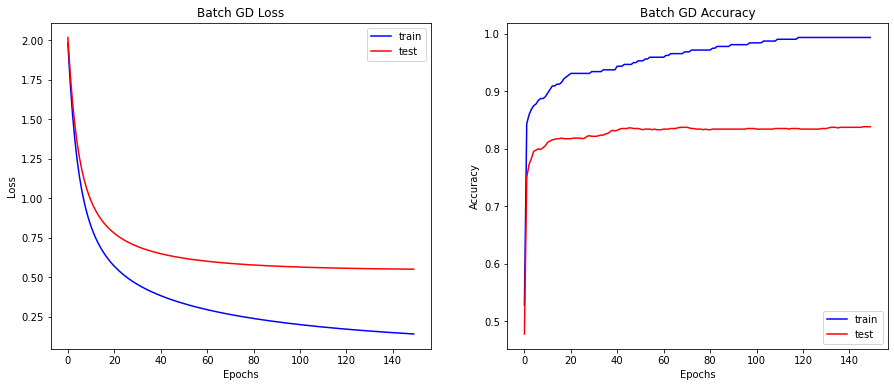

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
for p in range(2):
    if p == 0:
        ax[p].plot(range(Batch_GD.epochs), Batch_GD.total_training_loss, 'b-', label='train')
        ax[p].plot(range(Batch_GD.epochs), Batch_GD.total_testing_loss, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Loss')
        ax[p].set_title('Batch GD Loss')
        ax[p].legend(loc='upper right')
    else:
        ax[p].plot(range(Batch_GD.epochs), Batch_GD.total_training_acc, 'b-', label='train')
        ax[p].plot(range(Batch_GD.epochs), Batch_GD.total_testing_acc, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Accuracy')
        ax[p].set_title('Batch GD Accuracy')
        ax[p].legend(loc='lower right')

#### Mini-batch SGD

In [61]:
optimizer = SGD(learning_rate=0.3)
Mini_batchSGD = LogisticRegression(optimizer=optimizer)
Mini_batchSGD.fit(Mini_batchSGD, x_train, y_train, test_data=(x_test, y_test), batch_size=32, epochs=150, imfo_print=15)

Best training acc:  0.99375
Best training loss:  0.1405156151014494
--------------------------------------------------
Best testing acc:  0.8385416666666666
Best testing loss:  0.5516081427875403


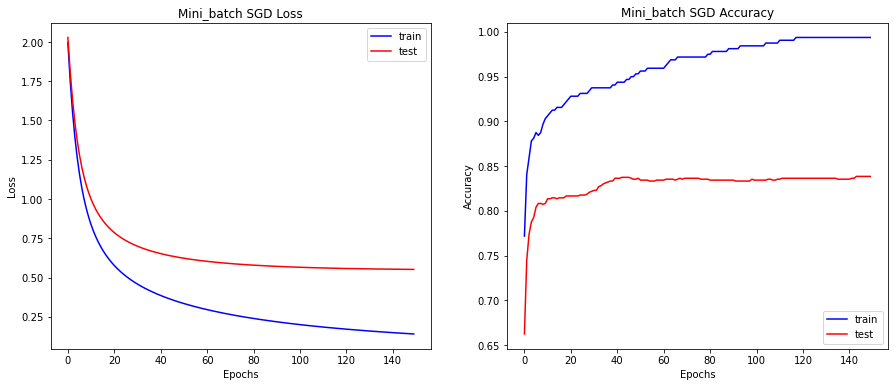

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
for p in range(2):
    if p == 0:
        ax[p].plot(range(Mini_batchSGD.epochs), Mini_batchSGD.total_training_loss, 'b-', label='train')
        ax[p].plot(range(Mini_batchSGD.epochs), Mini_batchSGD.total_testing_loss, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Loss')
        ax[p].set_title('Mini_batch SGD Loss')
        ax[p].legend(loc='upper right')
    else:
        ax[p].plot(range(Mini_batchSGD.epochs), Mini_batchSGD.total_training_acc, 'b-', label='train')
        ax[p].plot(range(Mini_batchSGD.epochs), Mini_batchSGD.total_testing_acc, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Accuracy')
        ax[p].set_title('Mini_batch SGD Accuracy')
        ax[p].legend(loc='lower right')

#### SGD

In [63]:
optimizer = SGD(learning_rate=0.3)
model_SGD = LogisticRegression(optimizer=optimizer)
model_SGD.fit(model_SGD, x_train, y_train, test_data=(x_test, y_test), batch_size=1, epochs=150, imfo_print=15)

Best training acc:  0.99375
Best training loss:  0.14047373868113883
--------------------------------------------------
Best testing acc:  0.8395833333333333
Best testing loss:  0.5510341666905046


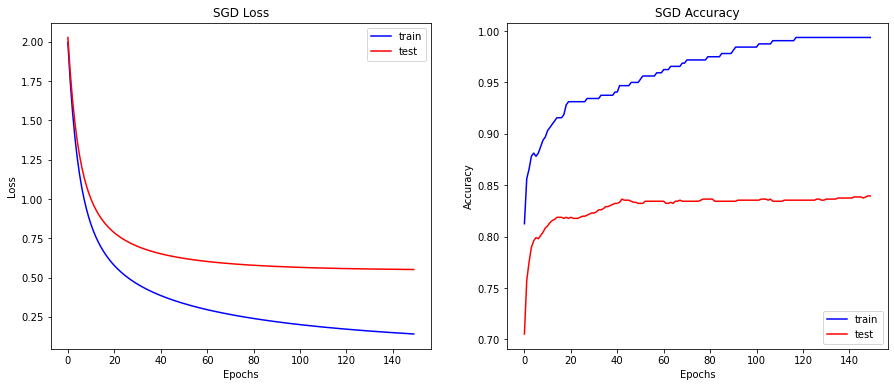

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
for p in range(2):
    if p == 0:
        ax[p].plot(range(model_SGD.epochs), model_SGD.total_training_loss, 'b-', label='train')
        ax[p].plot(range(model_SGD.epochs), model_SGD.total_testing_loss, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Loss')
        ax[p].set_title('SGD Loss')
        ax[p].legend(loc='upper right')
    else:
        ax[p].plot(range(model_SGD.epochs), model_SGD.total_training_acc, 'b-', label='train')
        ax[p].plot(range(model_SGD.epochs), model_SGD.total_testing_acc, 'r-', label='test')
        ax[p].set_xlabel('Epochs')
        ax[p].set_ylabel('Accuracy')
        ax[p].set_title('SGD Accuracy')
        ax[p].legend(loc='lower right')

<center>
<table>
    <tr>
        <th>
            Method
        </th>
        <th>
            Figure
        </th>
    </tr>
    <tr>
        <td>
            Batch GD
        </td>
        <td>
            <img src = "1.2(1).png" width="800">
        </td>
    </tr>
    <tr>
        <td>
            Mini-batch SGD
        </td>
        <td>
            <img src = "1.2(2).png" width="800">
        </td>
    </tr>
    <tr>
        <td>
            SGD
        </td>
        <td>
            <img src = "1.2(3).png" width="800">
        </td>
    </tr>
</table>
</center>

<style>
.red{
    color: red;
}
</style>
(b) **Show** the <span class="red">final</span> classification accuracy and loss value of training and test data.

<center>
<table>
    <tr>
        <th>
            Method
        </th>
        <th>
            Final result
        </th>
    </tr>
    <tr>
        <td>
            Batch GD
        </td>
        <td>
            <img src = "batchGD.png" width="500">
        </td>
    </tr>
    <tr>
        <td>
            Mini-batch SGD
        </td>
        <td>
            <img src = "minibatchSGD.png" width="500">
        </td>
    </tr>
    <tr>
        <td>
            SGD
        </td>
        <td>
            <img src = "SGD.png" width="500">
        </td>
    </tr>
</table>
</center>

(c) Based on your observation about the different algorithms (batch GD, SGD and mini-batch SGD), please **make some discussion.**

##### **Gradient descent**

Gradient descent is a method of finding the best solution in optimization theory, also it usually uses as backpropagation for updating weight.

The main thing is to find the local minimum of the function by gradient descent.

$$
    \textbf{x}^{(t+1)} = \textbf{x}^{(t)} - \gamma \nabla f(\textbf{x}^{(t)})
$$

The formula is updated in the direction of the gradient, and how much to update at a time is controlled by the learning rate $\gamma$.

##### **Batch gradient descent**

It means that all samples are trained in one iteration, and just keep iterating like this.

##### **Mini-batch gradient descent**

With mini-batch gradient descent update parameters with a fraction of samples at a time, and the batch size is determined by developers.

It's a compromise between batch gradient descent and stochastic gradient descent.

##### **Stochastic gradient descent (SGD)**

The model is trained by only one sample.

##### **Comparison Chart**

<center>
    <table>
        <tr>
            <th>
                Method
            </th>
            <th>
                Advantages
            </th>
            <th>
                Drawbacks
            </th>
        </tr>
        <tr>
            <td>
                Batch GD
            </td>
            <td>
                Ideally, the global optimum can be reached after enough iterations.
            </td>
            <td>
                If the dataset is too large. The memory size can't put the whole dataset for training the model. <br><br>
                The computation will take too much time for each iteration.
            </td>
        </tr>
        <tr>
            <td>
                Mini-batch SGD
            </td>
            <td>
                It's a compromise between batch gradient descent and stochastic gradient descent.
            </td>
            <td>
                It's a compromise between batch gradient descent and stochastic gradient descent.
            </td>
        </tr>
        <tr>
            <td>
                SGD
            </td>
            <td>
                The method accelerate the convergence speed and solve the problem <br>
                that a large amount of data cannot be stuffed into the memory at one time.
            </td>
            <td>
                It will let the weight convergences instability. So the final result may not be the best, like batch gradient descent.
            </td>
    </tr>
    </table>
    <br>
        <img src = "figure1.png" width="800">
    <br>
        <img src = "figure2.png" width="800">
    </center>

#### 1.3 
**Make some discussion** about the difference between the results of 1.1 and 1.2.

<center>
<table>
    <tr>
        <th>
            Method
        </th>
        <th>
            Final result
        </th>
    </tr>
    <tr>
        <td>
            Least square solution
        </td>
        <td>
            <img src = "lsq.png" width="500">
        </td>
    </tr>
    <tr>
        <td>
            Batch GD
        </td>
        <td>
            <img src = "batchGD.png" width="500">
        </td>
    </tr>
    <tr>
        <td>
            Mini-batch SGD
        </td>
        <td>
            <img src = "minibatchSGD.png" width="500">
        </td>
    </tr>
    <tr>
        <td>
            SGD
        </td>
        <td>
            <img src = "SGD.png" width="500">
        </td>
    </tr>
</table>
</center>

**Least square solution**: is an optimization solution to find the best fit line/curve to your numerical data.

**Gradient descent**: is a method of finding the best solution in optimization theory.

As we can see, both testing accuracy and training accuracy with gradient descent method have better result.

Since, gradient descent is an algorithm for approximately constructing solutions to optimization problems. 

The advantage is that it can be applied to any objective function, and gradient descent is one way to get at least a local optimum.

With least square solution, we may know that squared distance may not be the right objective function for your problem.

After all, gradient descent might be a good choice since it can be used in general.

<style>
.blue{
    color: skyblue;
}
.bold{
    font-weight: bold;
}
.red{
    color: red;
}
</style>

<h2>2 Gaussian Process for Regression</h2>
In this exercise, you will implement Gaussian process (GP) for regression. 

The files <span class="red">x.csv</span> and <span class="red">t.csv</span> have input data $\textbf{x}:\{x_1, x_2,...,x_{300}\}$ , $0 < x_i < 10$ and the corresponding target data $t : \{t_1, t_2, . . . , t_{300}\}$ respectively. 

Please take the first 150 points as the training set and the rest
as the test set. A regression function $y(\cdot)$ is used to express the target value by
$$
    t_n = y(x_n) +\epsilon_n
$$
where the  noisy signal $\epsilon_n$ is Gaussian distributed, $\epsilon_n \sim \mathcal{N}(0, \beta^{-1})$ with $\beta^{-1} = 1$.

#### 2.1
Please construct a kernel function using the basis functions in the following polynomial
model and implement the Gaussian process for regression.
$$
    y(\textbf{x}, \textbf{w}) = w_0 + \sum_{i = 1}^D w_ix_i + \sum_{i=1}^D\sum_{j=1}^D w_{ij}x_ix_j \ \ (M = 2)
$$
Please **plot** the prediction result like Figure 6.8 of textbook for training set but <span class="red">one standard deviation</span> instead of two and without the green curve. 

The red line shows the mean $m(\cdot)$ of the Gaussian process predictive distribution. 

The pink region corresponds to the band with positive and negative of one standard deviation. Training data points are
shown in blue. 

Besides, please **show** the corresponding <span class="blue">root-mean-square errors</span> (shown below) for both training and test sets in **.ipynb** file.
$$
    E_{RMS} = \sqrt{\frac{1}{N}(m(x_n) - t_n)^2}
$$

In [65]:
def load_data_2():
    data = pd.read_csv('x.csv', header=None)
    target = pd.read_csv('t.csv', header=None)
    return data, target

def RMS(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


In [66]:
class GKP1:
    """thete is hyper-parameters for kernel function"""
    def __init__(self, beta=1):
        self.beta = beta
    
    def fit(self, X, y):
        self.sample_size, self.n_features = X.shape
        self.X = X
        self.y = y
    
    def predict(self, X):
        mean = []
        std = []
        for x in X:
           m, v = self._predict(x)
           mean.append(m.item())
           std.append(v)
        return np.array(mean), np.array(std)
    
    def _predict(self, x):
        """predict for singal data"""
        K = self.K(x)
        C = self.C()
        c = self.c(x)

        mean = (np.dot(K.T, np.linalg.inv(C))).dot(self.y)
        std = np.sqrt(c - np.dot(np.dot(K.T, np.linalg.inv(C)), K))

        return mean, std
    
    def K(self, x):
        """K為預測資料和所有訓練資料做成的kernel"""
        return np.array([self.polynomial(x, point) for point in self.X])
    
    def C(self):
        """計算訓練之間的相關性"""
        c = np.zeros((self.sample_size, self.sample_size))
        for n in range(self.sample_size):
            for m in range(self.sample_size):
                c[n, m] = self.polynomial(self.X[n], self.X[m]) + self.beta**-1 * (1 if n==m else 0)
        return np.array(c)
    
    def c(self, x):
        """預測資料自己和自己做成的kernel"""
        return self.polynomial(x, x) + self.beta**-1

    @staticmethod
    def polynomial(xn, xm):
        """一次各一筆資料算kernel"""
        return (1 + np.dot(xn.T, xm))**2


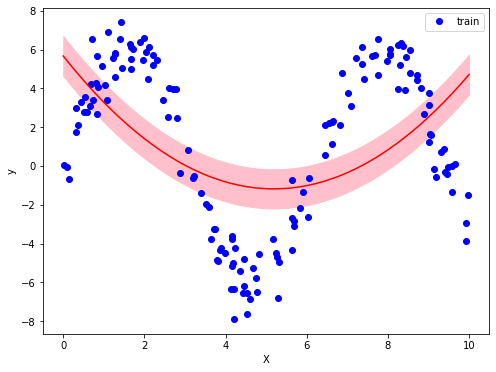

In [67]:
data, target = load_data_2()

x_train, x_test, y_train, y_test = data.values[:150], data.values[150:], target.values[:150], target.values[150:] # 150 training samples, 150 testing samples

x = np.linspace(0, 10, 150).reshape(-1, 1)

model = GKP1() 
model.fit(x_train, y_train)   
mean, std = model.predict(x)

plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'bo', label='train')
plt.plot(x, mean, '-', c='r')
plt.fill_between(x.flatten(), mean+std, mean-std, color='pink')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.savefig('GP.png')
plt.show()

In [68]:
model = GKP1()
model.fit(x_train, y_train)

# train
mean, _ = model.predict(x_train)
rmstrain = RMS(y_train.flatten(), mean)

# test
mean, _ = model.predict(x_test)
rmstest = RMS(y_test.flatten(), mean) 

print(f'Training RMS {rmstrain:.3f}, Testing RMS {rmstest:.3f}')

Training RMS 3.717, Testing RMS 4.019


**Gaussian process predictive distribution**

<center>
    <img src="GP.png" width="700">
</center>

<style>
.blue{
    color: skyblue;
}
.bold{
    font-weight: bold;
}
.red{
    color: red;
}
</style>
#### 2.2
Repeat 1 by using the widely used <span class="blue">exponential-quadratic kernel function</span> given by
$$
    k(\textbf{x}_n, \textbf{x}_m) = \theta_0 \exp \{-\frac{\theta_1}{2} \| \textbf{x}_n - \textbf{x}_m \|^2 \} + \theta_2 + \theta_3 \textbf{x}_n^T \textbf{x}_m
$$
where the hyperparameters $\textbf{\textit{θ}} = \{θ_0, θ_1, θ_2, θ_3\}$ are fixed. Please use the training set with <span class="blue">four different combinations</span>
* linear kernel $\textbf{\textit{θ}} = \{0, 0, 0, 1\}$
* squared exponential kernel $\textbf{\textit{θ}} = \{1, 1, 0, 0\}$
* exponential-quadratic kernel $\textbf{\textit{θ}} = \{1, 1, 0, 16\}$
* exponential-quadratic kernel $\textbf{\textit{θ}} = \{1, 2, 16, 0\}$

Each combination needs to **plot** the prediction result where the **title of the figure** should be the value of hyperparameter used in the model and 

**show** the corresponding root-mean-square error. An example of figure is provided below.
<center>
    <img src="2.2.jpg">
</center>

In [69]:
class GKP2:
    """thete is hyper-parameters for kernel function"""
    def __init__(self, theta, beta=1):
        self.theta = theta
        self.beta = beta
    
    def fit(self, X, y):
        self.sample_size, self.n_features = X.shape
        self.X = X
        self.y = y
    
    def predict(self, X):
        mean = []
        std = []
        for x in X:
           m, v = self._predict(x)
           mean.append(m.item())
           std.append(v)
        return np.array(mean), np.array(std)
    
    def _predict(self, x):
        """predict for singal data"""
        K = self.K(x)
        C = self.C()
        c = self.c(x)

        mean = (np.dot(K.T, np.linalg.inv(C))).dot(self.y)
        std = np.sqrt(c - np.dot(np.dot(K.T, np.linalg.inv(C)), K))

        return mean, std
    
    def K(self, x):
        """K為預測資料和所有訓練資料做成的kernel"""
        return np.array([self.exponential_quadratic(x, point, **self.theta) for point in self.X])
    
    def C(self):
        """計算訓練之間的相關性"""
        c = np.zeros((self.sample_size, self.sample_size))
        for n in range(self.sample_size):
            for m in range(self.sample_size):
                c[n, m] = self.exponential_quadratic(self.X[n], self.X[m], **self.theta) + self.beta**-1 * (1 if n==m else 0)
        return np.array(c)
    
    def c(self, x):
        """預測資料自己和自己做成的kernel"""
        return self.exponential_quadratic(x, x, **self.theta) + self.beta**-1

    @staticmethod
    def exponential_quadratic(xn, xm, *, t0, t1, t2, t3):
        """一次各一筆資料算kernel"""
        return t0 * np.exp(-0.5 * t1 * np.dot((xn-xm), (xn-xm))) + t2 + t3*np.dot(xn.T, xm)


In [70]:
# 題目設定的hyper-parameters
theta = [
    {'t0':0, 't1':0, 't2':0, 't3':1},
    {'t0':1, 't1':1, 't2':0, 't3':0},
    {'t0':1, 't1':1, 't2':0, 't3':16},
    {'t0':1, 't1':2, 't2':16, 't3':0},
]
x = np.linspace(0, 10, 300).reshape(-1, 1)

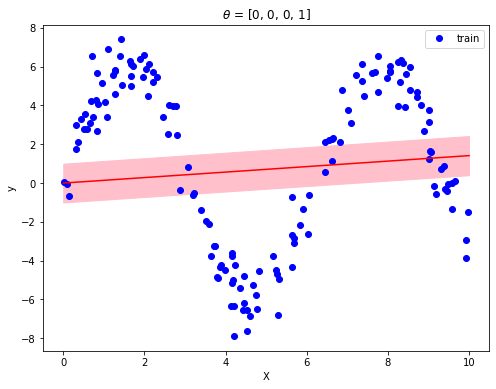

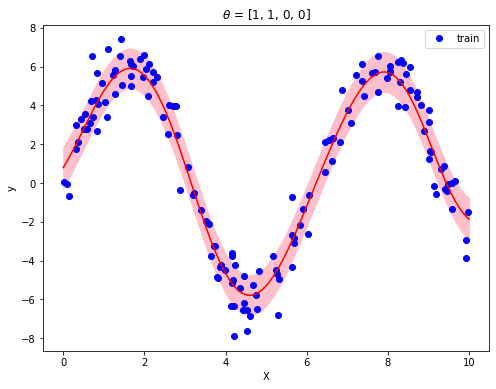

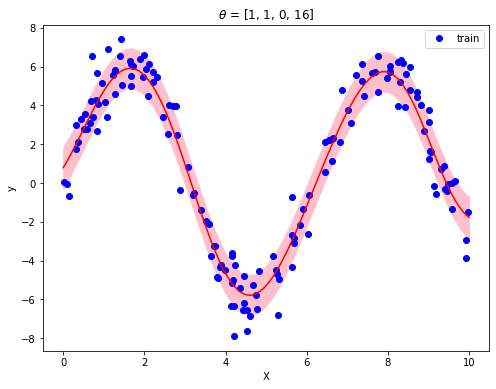

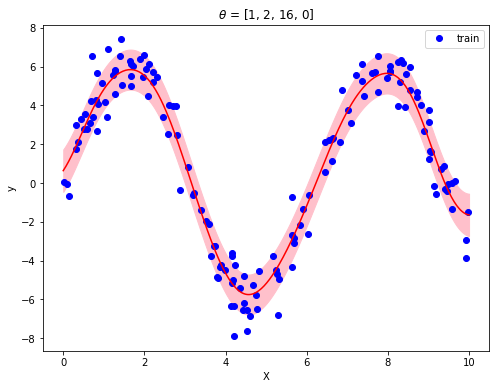

In [71]:
for i in range(len(theta)):
    model = GKP2(theta=theta[i]) 
    model.fit(x_train, y_train)   
    mean, std = model.predict(x)

    plt.figure(figsize=(8, 6))

    plt.plot(x_train, y_train, 'bo', label='train')
    plt.plot(x, mean, '-', c='r')
    plt.fill_between(x.flatten(), mean+std, mean-std, color='pink')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(r'$\theta$ = '+f'{list(theta[i].values())}')
    plt.legend()
    title = 'Theta' + str(i+1) + '.png'
    plt.savefig(title)
    plt.show()

In [72]:
for t in theta:
    model = GKP2(theta=t)
    model.fit(x_train, y_train)
    
    # train
    mean, _ = model.predict(x_train)
    rmstrain = RMS(y_train.flatten(), mean)

    # test
    mean, _ = model.predict(x_test)
    rmstest = RMS(y_test.flatten(), mean) 

    print(f'\u03B8: {list(t.values())}, Training RMS {rmstrain:.3f}, Testing RMS {rmstest:.3f}')

θ: [0, 0, 0, 1], Training RMS 4.336, Testing RMS 4.379
θ: [1, 1, 0, 0], Training RMS 0.956, Testing RMS 0.960
θ: [1, 1, 0, 16], Training RMS 0.957, Testing RMS 0.962
θ: [1, 2, 16, 0], Training RMS 0.950, Testing RMS 0.971


<center>
    <img src = "theta.png", width="700">
</center>

**Gaussian process predictive distribution with different kernel**

<center>
    <table>
        <tr>
            <th>
                Kernel
            </th>
            <th>
                Figure
            </th>
        </tr>
        <tr>
            <td>
                linear kernel <br>
                &theta; = {0, 0, 0, 1}
            </td>
            <td>
                <img src="Theta1.png" width="500">
            </td>
        </tr>
        <tr>
            <td>
                squared exponential kernel <br>
                &theta; = {1, 1, 0, 0}
            </td>
            <td>
                <img src="Theta2.png" width="500">
            </td>
        </tr>
        <tr>
            <td>
                exponential-quadratic kernel <br>
                &theta; = {1, 1, 0, 16}
            </td>
            <td>
                <img src="Theta3.png" width="500">
            </td>
        </tr>
        <tr>
            <td>
                exponential-quadratic kernel <br>
                &theta; = {1, 2, 16, 0}
            </td>
            <td>
                <img src="Theta4.png" width="500">
            </td>
        </tr>
    </table>
</center>

<style>
.blue{
    color: skyblue;
}
.bold{
    font-weight: bold;
}
.red{
    color: red;
}
</style>
#### 2.3
Try to **tune the hyperparameter** in 2 to find the best combination for the dataset. Use <span class="blue">automatic relevance determination</span> (ARD) in Chapter 6.4.4 of textbook.

In [86]:
class Ard:
    def __init__(self, learning_rate=0.001, max_iter=1000):
        self.lr = learning_rate
        self.max_iter = max_iter
    
    def param_differential(self, model, *, t0, t1, t2, t3):
        dt0, dt1, dt2, dt3 = [np.empty((model.sample_size, model.sample_size)) for _ in range(4)]
        for n in range(model.sample_size):
            for m in range(model.sample_size):
                dt0[n, m] = np.exp(-0.5 * t1 * ((model.X[n]-model.X[m])**2))
                dt1[n, m] = t0 * np.exp(-0.5 * t1 * np.dot((model.X[n]-model.X[m]), (model.X[n]-model.X[m]))) * (-0.5 * np.dot((model.X[n]-model.X[m]), (model.X[n]-model.X[m])))
                dt2[n, m] = 1
                dt3[n, m] = np.dot(model.X[n], model.X[m])
        
        return dt0, dt1, dt2, dt3
    
    def updata_param(self, model):
        t0, t1, t2, t3 = model.theta.values()
        for _ in range(self.max_iter):
            dt0, dt1, dt2, dt3 = self.param_differential(model, **model.theta)
            t0 += self.lr * self.loglikelihood(model, dt0)
            t1 += self.lr * self.loglikelihood(model, dt1)
            t2 += self.lr * self.loglikelihood(model, dt2)
            t3 += self.lr * self.loglikelihood(model, dt3)
            model.theta = {'t0':t0.item(), 't1':t1.item(), 't2':t2.item(), 't3':t3.item()}
            print(model.theta, end='\r')

        return model.theta

    def loglikelihood(self, model, dtheta):
        c_inv = np.linalg.inv(model.C())
        return -0.5*np.trace((c_inv @ dtheta)) + (0.5*(model.y.T @ c_inv)@(dtheta)@ c_inv)@(model.y)

In [88]:
theta = [
    {'t0':1, 't1':1, 't2':1, 't3':1},
]

In [90]:
for t in theta:
    optimizer = Ard(learning_rate=0.01, max_iter=50)
    model = GKP2(theta=t)
    model.fit(x_train, y_train)
    
    # optimized RMS
    model.theta = optimizer.updata_param(model)
    optim_param = {f"{key}":round(model.theta[key], 3) for key in model.theta}
    mean, _ = model.predict(x_train)
    rmstrain = RMS(y_train.flatten(), mean)
    mean, _ = model.predict(x_test)
    rmstest = RMS(y_test.flatten(), mean) 
    
    print(f'\u03B8: {list(optim_param.values())}, Training RMS {rmstrain:.3f}, Testing RMS {rmstest:.3f}')

{'t0': 1.5071832469056023, 't1': 1.0374413971216383, 't2': 1.0005053966663715, 't3': 0.9950901708213623}
{'t0': 1.7317440191861762, 't1': 1.0423946061430969, 't2': 1.0000762369910616, 't3': 0.9901659045272032}
{'t0': 1.900985365128602, 't1': 1.0403281888185898, 't2': 0.9994256469778442, 't3': 0.9852235492835031}
{'t0': 2.040708466842499, 't1': 1.0347459624408846, 't2': 0.9986511591219296, 't3': 0.9802618645937994}
{'t0': 2.16137994531731, 't1': 1.0271482954515818, 't2': 0.9977950284827134, 't3': 0.9752799689671703}
{'t0': 2.2684997147247525, 't1': 1.018346369578927, 't2': 0.9968804311519629, 't3': 0.9702771454833163}
{'t0': 2.3653802800187256, 't1': 1.0088357401491657, 't2': 0.9959217778194268, 't3': 0.9652527683121017}
{'t0': 2.4541966447210575, 't1': 0.9989425847979649, 't2': 0.9949287765147782, 't3': 0.9602062665801612}
{'t0': 2.5364653970497364, 't1': 0.9888920550880193, 't2': 0.9939083452944701, 't3': 0.9551371039382441}
{'t0': 2.613292061236052, 't1': 0.9788441935463196, 't2': 0.

<center>
    <img src = "opt_theta.png", width="700">
</center>

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(x_train, y_train, 'bo', label='train')
plt.plot(x, mean, '-', c='r')
plt.fill_between(x.flatten(), mean+std, mean-std, color='pink')
plt.xlabel('X')
plt.ylabel('y')
plt.title(r'$\theta$ = '+f'{list(theta[i].values())}')
plt.legend()
title = 'Theta' + str(i+1) + '.png'
plt.savefig(title)
plt.show()

#### 2.4
Explain your findings and **do some discussion.**

With automatic relevance determination (ARD), some parameters gradually decreases with the number of iterations. 

It can be clearly felt that it can **help us filter out dimensions in the data that are not helpful for Gaussian Process prediction.**

The weights of the regression model are assumed to be in Gaussian distributions.

So each of the theta, their root mean square are lower than without using automatic relevance determination.